# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)
Patrick Osornio, Elie de Gabriac , 4IR A1 , 

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import csv
import numpy as np
from utils import load_from_csv
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")


In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [3]:
clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=1000, min_samples_leaf= 10)

clftask2 = tree.DecisionTreeClassifier(splitter = "random", max_depth=1000, min_samples_leaf= 15)

clftask3 = tree.DecisionTreeClassifier(splitter = "best", max_depth=10, min_samples_leaf= 1)

clftask4 = tree.DecisionTreeClassifier(splitter = "random", max_depth=10, min_samples_leaf= 1)


clftask5 = tree.DecisionTreeClassifier(splitter = "best", max_depth=1000, min_samples_leaf= 40)
clftask6 = tree.DecisionTreeClassifier(splitter = "random", max_depth=1000, min_samples_leaf= 41)


Q2: Train a decision tree for each of the previous configurations on the full dataset

In [4]:
clftask1 = clftask1.fit(train_examples,train_labels)
clftask2 = clftask2.fit(train_examples,train_labels)
clftask3 = clftask3.fit(train_examples,train_labels)
clftask4 = clftask4.fit(train_examples,train_labels)
clftask5 = clftask5.fit(train_examples,train_labels)
clftask6 = clftask6.fit(train_examples,train_labels)

Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [5]:
scores1 = cross_val_score(clftask1, train_examples,train_labels, cv=5)
scores2 = cross_val_score(clftask4, train_examples,train_labels, cv=5)


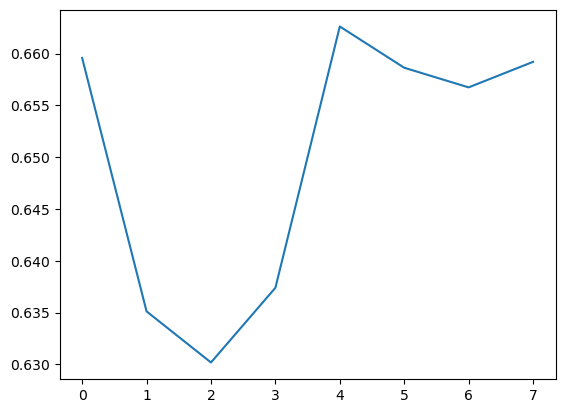

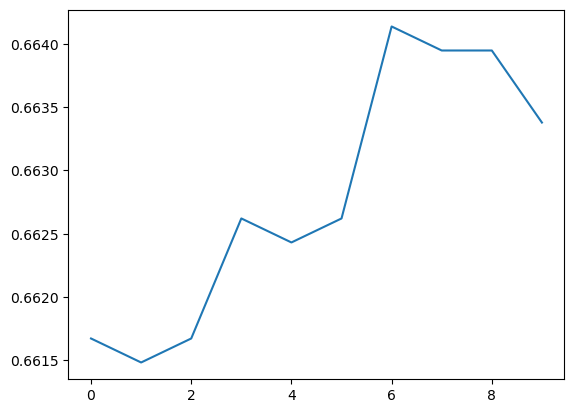

In [29]:
def plot_scoresDepth():
    scores = []
    clftask0 = tree.DecisionTreeClassifier(splitter = "best", max_depth=None, min_samples_leaf= 10)
    scores0 = cross_val_score(clftask0, train_examples,train_labels, cv=5)
    scores.append(scores0.mean())
    for i in range (1,8):
        depth = i
        clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=depth, min_samples_leaf= 10)
        scores1 = cross_val_score(clftask1, train_examples,train_labels, cv=5)
        scores.append(scores1.mean())
    plt.plot(scores)
    plt.show()
#the best depth is 4
def plot_scores_leaf():   
    scores = []
    clftask0 = tree.DecisionTreeClassifier(splitter = "best", max_depth=4, min_samples_leaf= 1)
    scores0 = cross_val_score(clftask0, train_examples,train_labels, cv=5)
    scores.append(scores0.mean())
    for i in range (1,10):
        leaf = i
        clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=4, min_samples_leaf= leaf*3)
        scores1 = cross_val_score(clftask1, train_examples,train_labels, cv=5)
        scores.append(scores1.mean())
    plt.plot(scores)
    plt.show()
plot_scores()
plot_scores_leaf()
#the best min_leaf is 6

Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

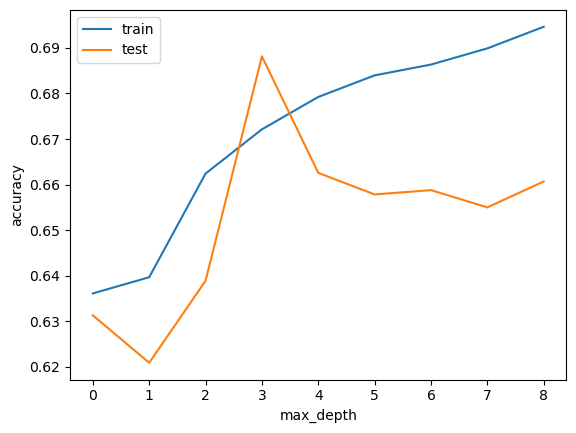

In [46]:
# to change the underfitting to overfitting, we just need to change the max_depth and min_samples_leaf parameters
# when our model has underfitting we can see how the scores increase slowly then decrease when
# max_depth becomes too large
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2)
train=[]
test=[]

for i in range (1,10):
    clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=i)
    clftask1 = clftask1.fit(X_train,y_train)
    test.append(clftask1.score(X_test,y_test))
    train.append(clftask1.score(X_train,y_train))
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()



Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2)
depth=3
clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=depth)
clftask1 = clftask1.fit(X_train,y_train)
cm=confusion_matrix(y_test,clftask1.predict(X_test))
print(cm)

cmravel=cm.ravel()
print(cmravel)


[[447 102]
 [299 207]]
[447 102 299 207]


Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate

In [53]:
#In train_example, the first binary feature indicates if the person is african-american or not.
# The second binary feature indicates if the person is caucasian or not.

#In train_labels, 1 indicates that the person has been arrested, 0 indicates that the person has not been arrested.
#We will separate the train_examples and train_labels into two groups, one for african-american and one for caucasian.
#Then we will train a decision tree for each group and evaluate the accuracy of each tree and their false positive rate.

african_american_examples = []
african_american_labels = []
caucasian_examples = []
caucasian_labels = []

for i in range (len(train_examples)):
    if train_examples[i][0]==1:
        african_american_examples.append(train_examples[i])
        african_american_labels.append(train_labels[i])
    elif train_examples[i][1]==1:
        caucasian_examples.append(train_examples[i])
        caucasian_labels.append(train_labels[i])

afAm_x_train, afAm_x_test, afAm_y_train, afAm_y_test = train_test_split(african_american_examples, african_american_labels, test_size=0.2)
cau_x_train, cau_x_test, cau_y_train, cau_y_test = train_test_split(caucasian_examples, caucasian_labels, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2)

clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=3)
clftask1 = clftask1.fit(afAm_x_train,afAm_y_train)


clftask2 = tree.DecisionTreeClassifier(splitter = "best", max_depth=3)
clftask2 = clftask2.fit(cau_x_train,cau_y_train)

print("accuracy of african-american decision tree: ",clftask1.score(afAm_x_test,afAm_y_test))
print("accuracy of caucasian decision tree: ",clftask2.score(cau_x_test,cau_y_test))

conf1 = confusion_matrix(afAm_y_test,clftask1.predict(afAm_x_test)).ravel()
print("false positive rate of african-american decision tree: ",conf1[1]/(conf1[1]+conf1[3]))

conf2 = confusion_matrix(cau_y_test,clftask2.predict(cau_x_test)).ravel()

print("false positive rate of caucasian decision tree: ",conf2[1]/(conf2[1]+conf2[3]))

#we now train a model that doesnt take ethnicity into account and compare it to the previous model
examples_wo_ethnicity = train_examples[:,2:]
xwoe_train, xwoe_test, ywoe_train, y_woe_test = train_test_split(examples_wo_ethnicity, train_labels, test_size=0.2)
# we exclude the first two features, i.e the etcnicity features
clftask3 = tree.DecisionTreeClassifier(splitter = "best", max_depth=3)
clftask3 = clftask3.fit(xwoe_train,ywoe_train)
print("accuracy of tree without ethnicity: ",clftask3.score(xwoe_test,y_woe_test))
conf3 = confusion_matrix(y_woe_test,clftask3.predict(xwoe_test)).ravel()
print("false positive rate without ethnicity", conf3[1]/(conf3[1]+conf3[3]))

clftask4 = tree.DecisionTreeClassifier(splitter = "best", max_depth=3)
clftask4 = clftask4.fit(train_examples,train_labels)
print("accuracy ",clftask4.score(train_examples,train_labels))
conf4 = confusion_matrix(train_labels,clftask4.predict(train_examples)).ravel()
print("false positive rate ", conf4[1]/(conf4[1]+conf4[3]))

accuracy of african-american decision tree:  0.6251968503937008
accuracy of caucasian decision tree:  0.6571428571428571
false positive rate of african-american decision tree:  0.3968609865470852
false positive rate of caucasian decision tree:  0.28378378378378377
accuracy of tree without ethnicity:  0.6748815165876777
false positive rate without ethnicity 0.35094339622641507
accuracy  0.6408116821543713
false positive rate  0.316052467207995


The false positive rate is significantly higher for african americans, and the score is lower. 
The algorithm is also more accurate when ethnicity is not a feature; 